In [1]:
from functions import regular, cartesian_components, sensibility_matrix, noise

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math

import pandas as pd


microm2m = 1.0E-6
m2microm = 1.0E6

In [2]:
sensor_sample_distance = 5.0  # micrometer
area = (0, 1000*microm2m, 0, 1000*microm2m)
shape = (1000,1000)
z = -sensor_sample_distance*microm2m

f = np.matrix(regular(area, shape, z))
X = np.array(f[0])
Y = np.array(f[1])
Z = np.array(f[2])

cm = 10**(-7) # H/m  == T·m/A


# generates sourcers
D = [-140, -70, 10, 125]
I = [-30 , -50, 62,  22]
M = [20000, 20000, 20000, 20000]
R = np.array([0.47, 0.45, 0.42, 0.39])*microm2m

Xc = np.array([250,  500, 750,  200])*microm2m
Yc = np.array([250,  500, 750,  800])*microm2m
Zc = np.array([5.30, 7.75, 8.50, 10.0])*microm2m


m = cartesian_components(D, I, M, R)
A = sensibility_matrix(X, Y, Z, Xc, Yc, Zc)

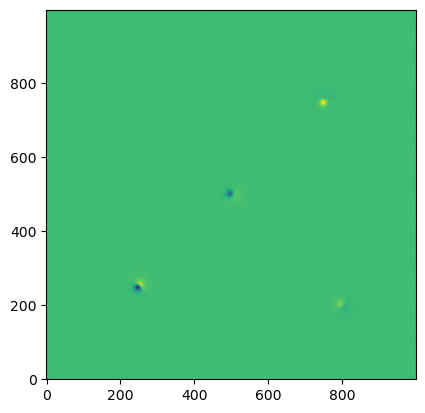

In [3]:
# data vector forward model
data = np.matmul(A, m)

#apply noise
noise_std_dev = 15.0e-9 # nT for the 'fixed method'
data = noise(data, error=noise_std_dev, method='fixed')

# Reshape data vector for the map plot
data_2D = np.reshape(data, shape)


# show data
plt.imshow(data_2D)
plt.gca().invert_yaxis()

In [4]:
# Export synthetic data
np.savetxt("Bz_synthetic.csv", data_2D, delimiter=",")

In [5]:
# Export grid spacing
X_2D = np.reshape(X, shape)
Y_2D = np.reshape(Y, shape)
Z_2D = np.reshape(Z, shape)

nx, ny = np.shape(data_2D)
y_step = (np.max(Y_2D)*m2microm - np.min(Y_2D)*m2microm) / (ny-1)
x_step = (np.max(X_2D)*m2microm - np.min(X_2D)*m2microm) / (nx-1)

grid_spacing = pd.DataFrame(data={'x step (m)':  [x_step*microm2m],
                        'y step (m)':  [y_step*microm2m],
                        'sensor distance sample (m)': [z]
                       })


In [6]:
# Export spheres parameters
model_par = pd.DataFrame(data={'Dec (°)': D,
                               'Inc (°)': I,
                               'Mag (A/m)': M,
                               'Radii (µm)': R*m2microm,
                               'Xc (µm)': Xc*m2microm,
                               'Yc (µm)': Yc*m2microm,
                               'Zc (µm)': Zc*m2microm
                              })

In [7]:
grid_spacing.to_csv('grid_spacing.csv', index=False)
model_par.to_csv('model_parameters.csv', index=False)